# Investigate a Dataset (TMDb Movie Data)
> The primary goal of the project is to go through the dataset and the general data analysis process using numpy, pandas and matplotlib. This contain four parts:

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset
- I choose the TMDb movie data set for data analysis. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.I would like to find other intresting patterns in the dataset.
<br><br>
> **The Data set contains: **
  - Total Rows = 10866
  - Total Columns = 21
  - After Seeing the dataset we can say that some columns is contain null values
  
  ### Questions
> 
1.  Which year has the highest and lowest release of movies?
2.  What kinds of properties are associated with movies that have high revenues?
3.  What is the movie with the highest and lowest budget?
4.  Which Movie Has The Highest Or Lowest Profit?
5.  Movie with the Highest and Lowest Earned Revenue
6.  Movie with Longest And Shortest Runtime?
7.  Which movie get the highest or lowest votes (Ratings).
8.  What is the average profit per year?
9.  Which length movies most liked by the audiences according to their popularity?
10. Average Runtime from Year to Year
11. Which Month released the Highest number of movies?
12. Which Genre Has The Highest Release Of Movies?
13. Most Frequent Cast?
14. Top 20 Production Companies With Higher Number Of Release?
15. Top 20 Director Who Directs Maximum Movies?


In [1]:
#Import packages used for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Get working directory
import os
cwd = os.getcwd()
# Print the current working directory
print("Current working directory: {0}".format(cwd))

Current working directory: C:\Users\Richard


In [3]:
# Change the current working directory
os.chdir('C:\\Users\\Richard\\Documents\\csv files')

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: C:\Users\Richard\Documents\csv files


In [4]:
#Reading the movies csv files into a dataframe
movies = pd.read_csv('tmdb-movies.csv')

In [5]:
#dimension of the dataframe(numbers of rows and column)
movies.shape

(10866, 21)

In [6]:
#shows the first three roles of the movie dataset
movies.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [7]:
#shows the last three rows of the movies dataset
movies.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [8]:
#informartion about the movie dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [9]:
#displaying a concise summary about the dataset
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [10]:
#get the numbers of missing values in a column
movies.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

<a id='wrangling'></a>
## Data Wrangling

> After Observing the dataset and the questions related to this dataset for the analysis we will be keeping only relevent data and deleting the unused data.
### General Properties

In [11]:
#list of column names
print(movies.columns)

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')


In [12]:
#deleting columns not needed for the analysis
movies.drop(['imdb_id','homepage','tagline','keywords','overview'], axis=1, inplace=True)

In [13]:
movies.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [14]:
#getting the sum of duplicated rows
sum(movies.duplicated())

1

In [15]:
#deleting duplicated rows
movies.drop_duplicates(inplace=True)

In [16]:
#change the datatype from object to datetime
movies['release_date'] = pd.to_datetime(movies['release_date'])

In [17]:
#getting to numbers of zero value in budget column
budget = movies['budget'].to_list()
print('The number of zero value in budget column is :',budget.count(0))

#getting to numbers of zero value in revenue column
revenue = movies['revenue'].to_list()
print('The number of zero value in revenue column is :',revenue.count(0))

The number of zero value in budget column is : 5696
The number of zero value in revenue column is : 6016


In [18]:
# Checking for an zero values in the budget and revenue columns
print("Rows With Zero Values In The Budget Column:",movies[(movies['budget']==0)].shape[0])
print("Rows With Zero Values In The Revenue Column:",movies[(movies['revenue']==0)].shape[0])

Rows With Zero Values In The Budget Column: 5696
Rows With Zero Values In The Revenue Column: 6016


In [19]:
#calculating the mean of the budget column
budget_mean = movies['budget'].mean()
print('The budget mean is :',budget_mean)

#calculating the mean of the revenue column
revenue_mean = movies['revenue'].mean()
print('The revenue mean is :',revenue_mean)

#calculating the mean of the budget_adj column
budget_adj_mean = movies['budget_adj'].mean()
print('The budget_adj mean is :',budget_adj_mean)

#calculating the mean of the revenue_adj column
revenue_adj_mean = movies['revenue_adj'].mean()
print('The revenue_adj mean is :',revenue_adj_mean)

#calculating the mean of the runtime column
runtime_mean = movies['runtime'].mean()
print('The runtime mean is :',budget_mean)

The budget mean is : 14624286.06433502
The revenue mean is : 39826896.07685228
The budget_adj mean is : 17549894.037320614
The revenue_adj mean is : 51369001.75884257
The runtime mean is : 14624286.06433502


In [20]:
#replcaing the zero values of the columns with the mean value
movies['budget'].replace({0:budget_mean},inplace=True)
movies['revenue'].replace({0:revenue_mean},inplace=True)
movies['budget_adj'].replace({0:budget_adj_mean},inplace=True)
movies['revenue_adj'].replace({0:revenue_adj_mean},inplace=True)
movies['runtime'].replace({0:runtime_mean},inplace=True)

>**Observation From The Dataset**
- The columns 'budget', 'revenue', 'budget_adj', 'revenue_adj' was not given any currency.But for this dataset i will assume the currency is in US dollor.
- The dataset contain lots of movies where the budget or revenue have a value of '0'.

### Data Cleaning (Removing The Unused Information From The Dataset)
> #### Information That We Need To Delete Or Modify
1. We need to remove duplicate rows from the dataset
2. Changing format of release date into datetime format
3. Remove the unused colums that are not needes in the analysis process.
4. Replacing the movies which are having zero value of budget and revenue with their means

In [21]:
#giving a concise summary of the cleaned movie dataset
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,2.229110e+07,6.187923e+07,102.363021,217.399632,5.975012,2001.321859,2.675046e+07,7.981225e+07
std,92134.091971,1.000231,2.801385e+07,1.110236e+08,30.904043,575.644627,0.935138,12.813260,3.051007e+07,1.365647e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.000000,0.207575,1.462429e+07,3.982690e+07,90.000000,17.000000,5.400000,1995.000000,1.754989e+07,5.136900e+07
50%,20662.000000,0.383831,1.462429e+07,3.982690e+07,99.000000,38.000000,6.000000,2006.000000,1.754989e+07,5.136900e+07
75%,75612.000000,0.713857,1.500000e+07,3.982690e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,5.136900e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


##### Since now we have the columns, rows and format of the dataset in right way, its time to investigate the data for the questions asked. 

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : Which year has the highest and lowest release of movies?

In [22]:
movies.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [23]:
#showing the numbers of movies released per yer
movies['release_year'].value_counts()

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    489
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1991    133
1992    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1977     57
1979     57
1973     55
1971     55
1976     47
1974     47
1966     46
1975     44
1964     42
1970     41
1967     40
1972     40
1968     39
1965     35
1963     34
1960     32
1962     32
1961     31
1969     31
Name: release_year, dtype: int64

Text(0.5, 1.0, 'Year Vs Number Of Movies')

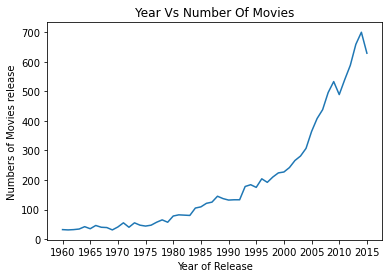

In [24]:
#ploting the year of movies against number of movies released
movies.groupby('release_year').count()['id'].plot(kind='line',xticks=np.arange(1960,2016,5))

#labelling the x_axis
plt.xlabel('Year of Release')

#labelling the y_axis
plt.ylabel('Numbers of Movies release')

#labelling the chart 
plt.title("Year Vs Number Of Movies")


After Seeing the plot and the output we can conclude that year 2014 year has the highest release of movies (700) while year 1961 & 1969 has the lowest release of movies with 31 movies release in those years.

### Research Question 2 : What kinds of properties are associated with movies that have high revenues?

In [25]:
movies.corr().round(2)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.00,-0.01,-0.10,-0.07,-0.08,-0.04,-0.06,0.51,-0.15,-0.11
popularity,-0.01,1.00,0.52,0.64,0.14,0.80,0.21,0.09,0.48,0.58
budget,-0.10,0.52,1.00,0.71,0.17,0.62,0.07,0.13,0.96,0.57
revenue,-0.07,0.64,0.71,1.00,0.14,0.77,0.15,0.07,0.67,0.91
runtime,-0.08,0.14,0.17,0.14,1.00,0.16,0.15,-0.11,0.20,0.15
vote_count,-0.04,0.80,0.62,0.77,0.16,1.00,0.25,0.11,0.57,0.69
vote_average,-0.06,0.21,0.07,0.15,0.15,0.25,1.00,-0.12,0.09,0.17
release_year,0.51,0.09,0.13,0.07,-0.11,0.11,-0.12,1.00,0.02,-0.06
budget_adj,-0.15,0.48,0.96,0.67,0.20,0.57,0.09,0.02,1.00,0.60
revenue_adj,-0.11,0.58,0.57,0.91,0.15,0.69,0.17,-0.06,0.60,1.00


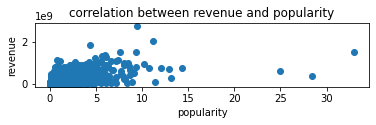

In [26]:
#visualizing the correlation bewteen revenue and popularity using a scatter plot

plt.subplot(3,1,1)
plt.scatter(movies['popularity'],movies['revenue'])
plt.xlabel('popularity')
plt.ylabel('revenue')
plt.title('correlation between revenue and popularity')

#adusting the size of the chart
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

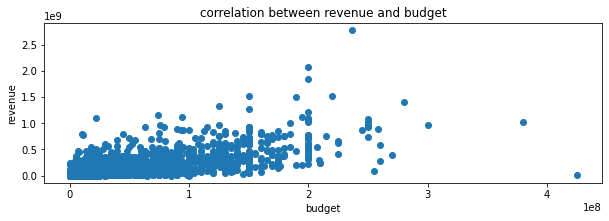

In [27]:
#visualizing the correlation bewteen revenue and budget using a scatter plot
plt.subplot(3,1,2)
plt.scatter(movies['budget'],movies['revenue'])
plt.xlabel('budget')
plt.ylabel('revenue')
plt.title('correlation between revenue and budget')

#adusting the size of the chart
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

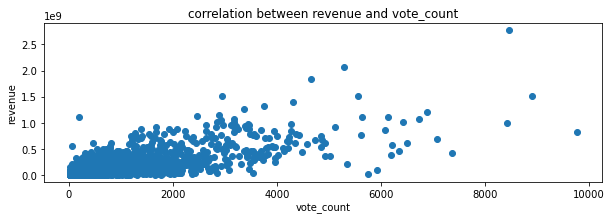

In [28]:
#visualizing the correlation bewteen revenue and vote_count using a scatter plot
plt.subplot(3,1,3)
plt.scatter(movies['vote_count'],movies['revenue'])
plt.xlabel('vote_count')
plt.ylabel('revenue')
plt.title('correlation between revenue and vote_count')

#adusting the size of the chart
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

from the correlation table and the scatter plot it is seen that there is a positive correlation between revenue against popularity and revenue against vote_count. i.e An increase in movie popularity and vote_count leads to increase in revenue generated from the movie 

In [29]:
#extracting from dataframe movie with the highest revenue
high_rev_movie = movies[movies['revenue'] == movies['revenue'].max()]
high_rev_movie


,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09


In [30]:
#extracting from the dataframe movie with the lowest revenue
low_rev_movie = movies[movies['revenue'] == movies['revenue'].min()]
low_rev_movie

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5067,13537,0.462609,6000000.0,2.0,Shattered Glass,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Billy Ray,94.0,Drama|History,Lions Gate Films|Cruise/Wagner Productions|Bau...,2003-11-14,46,6.4,2003,7.112116e+06,2.370705
8142,2293,0.552091,6000000.0,2.0,Mallrats,Jason Lee|Jeremy London|Shannen Doherty|Claire...,Kevin Smith,94.0,Romance|Comedy,Gramercy Pictures|Alphaville Films|View Askew ...,1995-10-20,201,6.8,1995,8.585801e+06,2.861934


from the above dataframe it can be seen that movie with high popularity, budget and vote_count correlates with high revenue.

### Research Question 3 : What is the movie with the highest and lowest budget?

In [31]:
#arranging the budget values from the largest to the smallest value
movie_budget = pd.DataFrame(movies['budget'].sort_values(ascending=False).head(10))

#merging the budget column with the movie title
movie_budget['original_title']=movies['original_title']
movie_budget['release_year']=movies['release_year']
movie_budget

,budget,original_title,release_year
2244,425000000.0,The Warrior's Way,2010
3375,380000000.0,Pirates of the Caribbean: On Stranger Tides,2011
7387,300000000.0,Pirates of the Caribbean: At World's End,2007
14,280000000.0,Avengers: Age of Ultron,2015
6570,270000000.0,Superman Returns,2006
4411,260000000.0,John Carter,2012
1929,260000000.0,Tangled,2010
7394,258000000.0,Spider-Man 3,2007
5508,255000000.0,The Lone Ranger,2013
4367,250000000.0,The Hobbit: An Unexpected Journey,2012


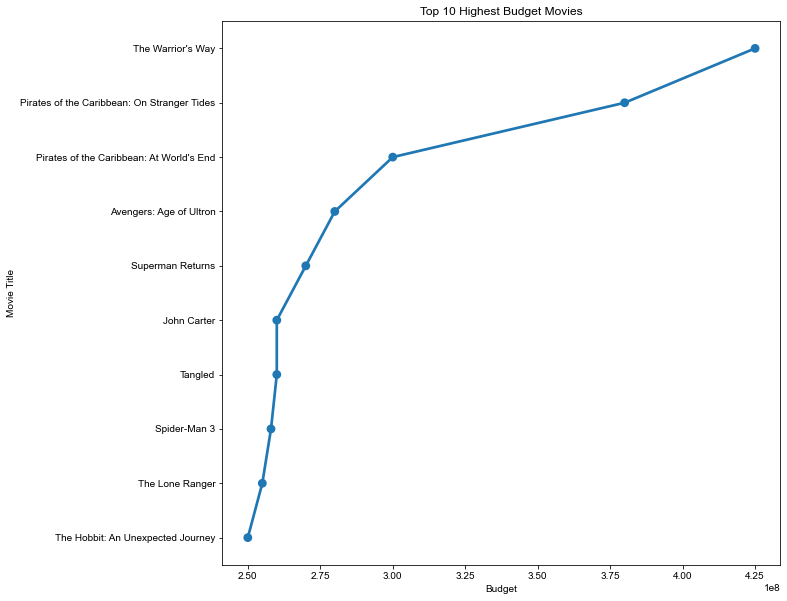

In [32]:
#ploting a graph of the top 10 highest budget movies
#setting our variables for our x and y axis
x = movie_budget['budget']
y = movie_budget['original_title']

#plotting the chart using seaborn packages
ax = sns.pointplot(x=x,y=y)

#giving the chart a title
ax.set_title('Top 10 Highest Budget Movies')

#giving the y-axis a label
ax.set_ylabel("Movie Title")

#giving the x-axis a label
ax.set_xlabel("Budget")

#chart size
sns.set(rc={'figure.figsize':(10,5)})

#giving the chart a style
sns.set_style('darkgrid')


#### From the above chart the movie 'The Warrior's Way' as the highest budget which was released in 2010

In [33]:
#arranging the budget values from the largest to the smallest value
movie_budgets = pd.DataFrame(movies['budget'].sort_values(ascending=True).head(10))

#merging the budget column with the movie title
movie_budgets['original_title']=movies['original_title']
movie_budgets['release_year']=movies['release_year']
movie_budgets

,budget,original_title,release_year
3581,1.0,"Love, Wedding, Marriage",2011
2618,1.0,Lost & Found,1999
3065,1.0,"Angus, Thongs and Perfect Snogging",2008
1151,1.0,Fear Clinic,2014
8944,2.0,Death Wish 2,1982
2398,3.0,Boy,2010
3765,3.0,Death of a Superhero,2011
10050,3.0,Tales from the Darkside: The Movie,1990
1313,5.0,Des Lendemains Qui Chantent,2014
8235,6.0,Tales from the Hood,1995


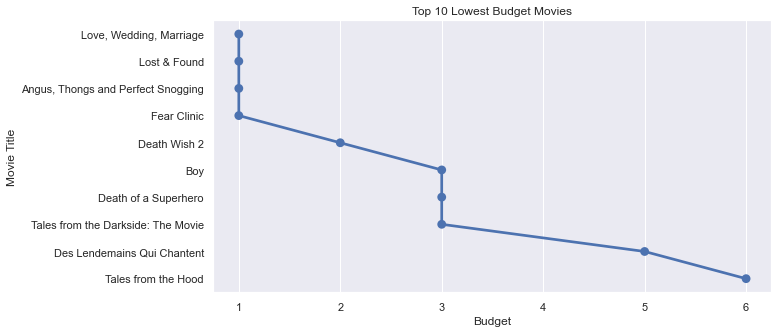

In [34]:
#ploting a graph of the top 10 lowest budget movies
#setting our variables for our x and y axis
x = movie_budgets['budget']
y = movie_budgets['original_title']

#plotting the chart using seaborn packages
ax = sns.pointplot(x=x,y=y,colour='red')

#giving the chart a title
ax.set_title('Top 10 Lowest Budget Movies')

#giving the y-axis a label
ax.set_ylabel("Movie Title")

#giving the x-axis a label
ax.set_xlabel("Budget")

#chart size
sns.set(rc={'figure.figsize':(10,5)})

#giving the chart a style
sns.set_style('darkgrid')


#### The Chart shows the Top lowest budget movies 

### Research Question 4 : Which Movie Has The Highest Or Lowest Profit?

In [35]:
movies['profit'] = movies['revenue'] - movies['budget']
movies.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.852382e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09


In [36]:
#creating a function to get the minimum and maximum values of a column using the indexminimun(idxmin) and indexmaximun fucntion(idxmax)
def high_low(x):
    min_index = movies[x].idxmin()
    max_index = movies[x].idxmax()
    low = pd.DataFrame(movies.loc[min_index,:])
    high = pd.DataFrame(movies.loc[max_index,:])
    print('The lowest ' + x +' movie is :',movies['original_title'][min_index],'with '+ x + ' of',movies[x][min_index])
    print('The highest ' + x +' movie is :',movies['original_title'][max_index],'with '+ x + ' of',movies[x][max_index])
    return pd.concat([low,high], axis=1)

#finding the highest and lowest profitable movies using the high_low function
high_low('profit')

The lowest profit movie is : The Warrior's Way with profit of -413912431.0
The highest profit movie is : Avatar with profit of 2544505847.0


,2244,1386
id,46528,19995
popularity,0.25054,9.432768
budget,425000000.0,237000000.0
revenue,11087569.0,2781505847.0
original_title,The Warrior's Way,Avatar
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,Sngmoo Lee,James Cameron
runtime,100.0,162.0
genres,Adventure|Fantasy|Action|Western|Thriller,Action|Adventure|Fantasy|Science Fiction
production_companies,Boram Entertainment Inc.,Ingenious Film Partners|Twentieth Century Fox ...


> The first column shows the highest profit made by a movie and second column shows the highest in loss movie in this dataset.

>As we can see that **'Avatar'** movie Directed by James Cameron earn the highest profit in all, making over 2.5B in profit in this dataset.And the most in loss movie in this dataset is **The Warrior's Way**. Going in loss by more than 400M was directed by Singmoo Lee.

### Research Question 5: Movie with Largest And Lowest Earned Revenue?

In [37]:
#using the high-low function created we find the movie with the highest and lowest earned revenue
high_low('revenue')

The lowest revenue movie is : Shattered Glass with revenue of 2.0
The highest revenue movie is : Avatar with revenue of 2781505847.0


,5067,1386
id,13537,19995
popularity,0.462609,9.432768
budget,6000000.0,237000000.0
revenue,2.0,2781505847.0
original_title,Shattered Glass,Avatar
cast,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,Billy Ray,James Cameron
runtime,94.0,162.0
genres,Drama|History,Action|Adventure|Fantasy|Science Fiction
production_companies,Lions Gate Films|Cruise/Wagner Productions|Bau...,Ingenious Film Partners|Twentieth Century Fox ...


In [38]:
#sorting out the values in the revenue from the highest to the lowest
rev = pd.DataFrame(movies['revenue'].sort_values(ascending=False).head(10))

#merging the original_title column from the original datasets to the newly created rev dataframe
rev['original_title'] = movies['original_title']

#showing the rows in the dataframe
rev.head(10)

,revenue,original_title
1386,2.781506e+09,Avatar
3,2.068178e+09,Star Wars: The Force Awakens
5231,1.845034e+09,Titanic
4361,1.519558e+09,The Avengers
0,1.513529e+09,Jurassic World
4,1.506249e+09,Furious 7
14,1.405036e+09,Avengers: Age of Ultron
3374,1.327818e+09,Harry Potter and the Deathly Hallows: Part 2
5422,1.274219e+09,Frozen
5425,1.215440e+09,Iron Man 3


Text(0.5, 1.0, 'Top 10 High Revenue Movies')

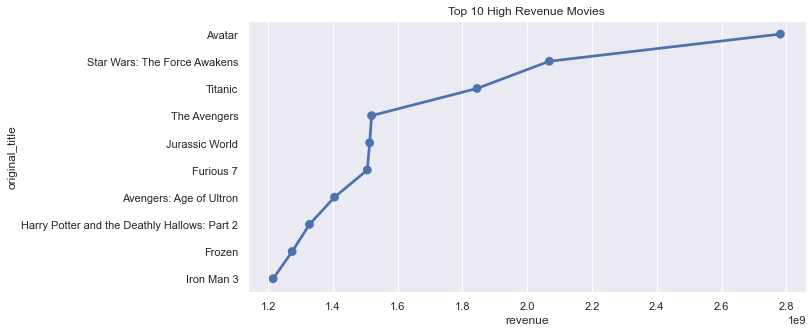

In [39]:
x = rev['revenue']
y = rev['original_title']
revplot = sns.pointplot(x=x,y=y)
revplot.set_title('Top 10 High Revenue Movies')

### Research Question 6 : Movie with Longest And Shortest Runtime?

In [40]:
#using the high-low function created we find the movie with the longest and shortest runtime
high_low('runtime')

The lowest runtime movie is : Fresh Guacamole with runtime of 2.0
The highest runtime movie is : The Story of Film: An Odyssey with runtime of 900.0


,4883,3894
id,142563,125336
popularity,0.078472,0.006925
budget,14624286.064335,14624286.064335
revenue,39826896.076852,39826896.076852
original_title,Fresh Guacamole,The Story of Film: An Odyssey
cast,NaN,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...
director,PES,Mark Cousins
runtime,2.0,900.0
genres,Animation,Documentary
production_companies,NaN,NaN


In [41]:
#sorting out the values in the runtime from the highest to the lowest
run = pd.DataFrame(movies['runtime'].sort_values(ascending=False).head(10))

#merging the original_title column from the original datasets to the newly created rev dataframe
run['original_title'] = movies['original_title']

#showing the rows in the dataframe
run.head(10)

,runtime,original_title
3894,900.0,The Story of Film: An Odyssey
4041,877.0,Taken
2722,705.0,Band of Brothers
6176,566.0,Shoah
6181,561.0,"North and South, Book I"
6894,550.0,Planet Earth
2214,540.0,The Pacific
3356,501.0,John Adams
1865,500.0,Life
3141,470.0,Generation Kill


Text(0.5, 1.0, 'Top 10 Longest Runtime Movies')

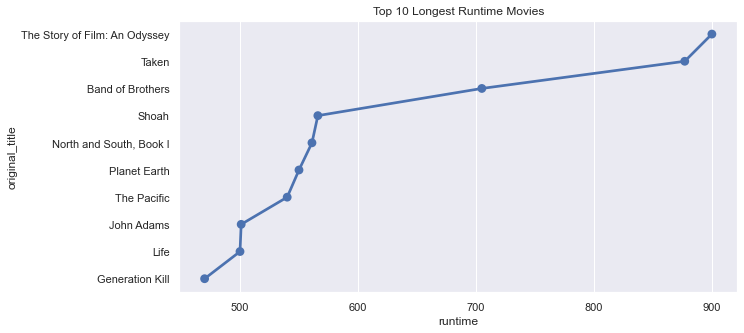

In [42]:
x = run['runtime']
y = run['original_title']
runplot = sns.pointplot(x=x,y=y)
runplot.set_title('Top 10 Longest Runtime Movies')

### Research Question 7 : Which movie get the highest or lowest votes (Ratings) ?

In [43]:
#using the high-low function created we find the movie with Highest And Lowest Votes?
high_low('vote_average')

The lowest vote_average movie is : Transmorphers with vote_average of 1.5
The highest vote_average movie is : The Story of Film: An Odyssey with vote_average of 9.2


,7772,3894
id,25055,125336
popularity,0.12112,0.006925
budget,14624286.064335,14624286.064335
revenue,39826896.076852,39826896.076852
original_title,Transmorphers,The Story of Film: An Odyssey
cast,Matthew Wolf|Amy Weber|Shaley Scott|Eliza Swen...,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...
director,Leigh Scott,Mark Cousins
runtime,86.0,900.0
genres,Action|Adventure|Science Fiction,Documentary
production_companies,"Asylum, The",NaN


In [44]:
#sorting out the values in the runtime from the highest to the lowest
vot_avg = pd.DataFrame(movies['vote_average'].sort_values(ascending=False).head(10))

#merging the original_title column from the original datasets to the newly created rev dataframe
vot_avg['original_title'] = movies['original_title']

#showing the rows in the dataframe
vot_avg.head(10)

,vote_average,original_title
3894,9.2,The Story of Film: An Odyssey
538,8.9,The Mask You Live In
1200,8.8,Black Mirror: White Christmas
2269,8.8,Life Cycles
6911,8.7,Pink Floyd: Pulse
2401,8.6,Opeth: In Live Concert At The Royal Albert Hall
3690,8.5,The Art of Flight
8411,8.5,Queen - Rock Montreal
8221,8.5,A Personal Journey with Martin Scorsese Throug...
8839,8.5,Dave Chappelle: Killin' Them Softly


Text(0.5, 1.0, 'Top 10 Highest Rated Movies')

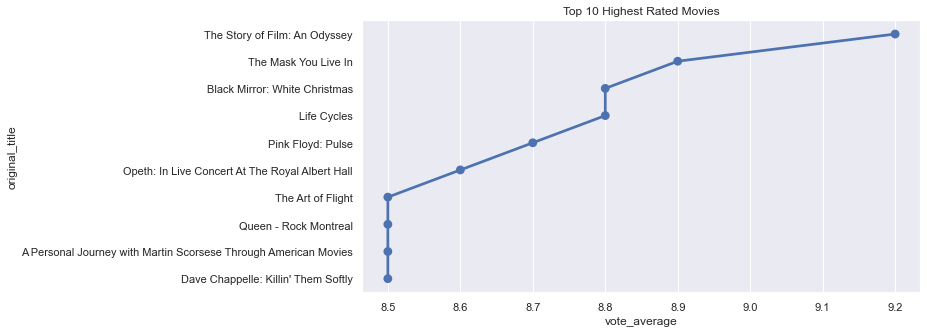

In [45]:
x = vot_avg['vote_average']
y = vot_avg['original_title']
avgplot = sns.pointplot(x=x,y=y)
avgplot.set_title('Top 10 Highest Rated Movies')

### Research Question 8 : What is the average profit per year?

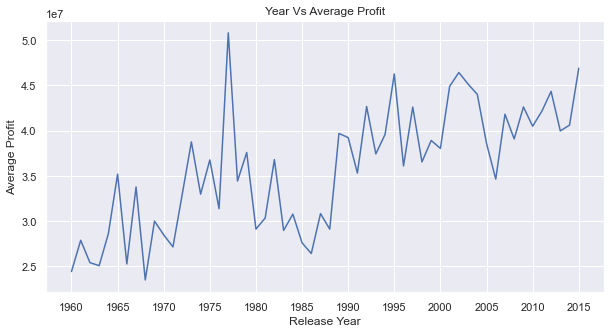

In [46]:
#arrange the data by release year with the average mean
rel_yr = movies.groupby('release_year')['profit'].mean().plot(xticks = np.arange(1960,2016,5))

plt.xlabel('Release Year')
plt.ylabel('Average Profit')
plt.title("Year Vs Average Profit")

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")


### Research Question 9 : Which length movies most liked by the audiences according to their popularity?

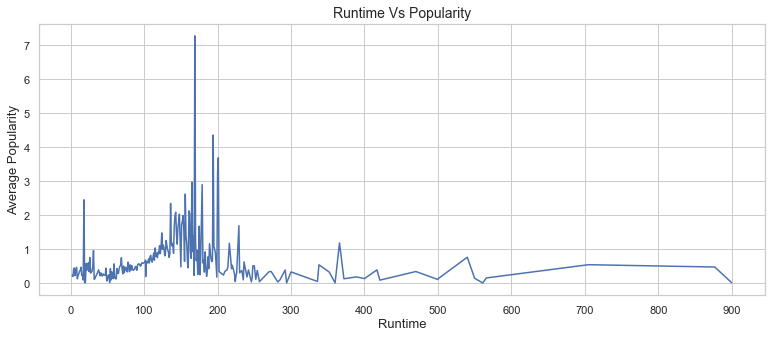

In [47]:
#use groupby function and group the data according to their runtime.
#make a plot using their popularity and find which length movies are most popular.

#make the group of the data according to their runtime and find the mean popularity related to this and plot.
movies.groupby('runtime')['popularity'].mean().plot(figsize = (13,5),xticks=np.arange(0,1000,100))

#setup the title of the figure
plt.title("Runtime Vs Popularity",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

> **According to the plot we can say that movies in the range of 100-200 runtime are more popular than other runtime movies. Because it is boring to see the long duration movies.**  

### Research Question 10: Average Runtime Of Movies From Year To Year?

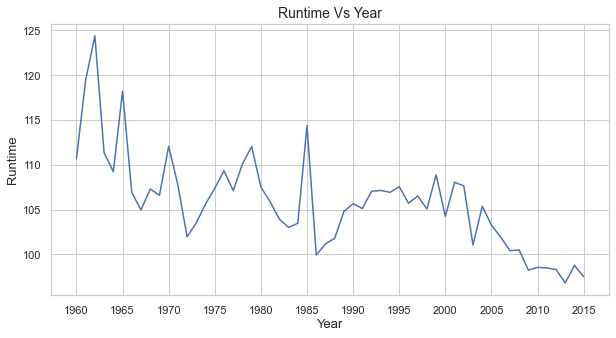

In [48]:
#show the runtime of the movies differ year to year.

#make the group of the data according to their release_year and find the mean  related to this and plot.
movies.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1960,2016,5))

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})

#setup the title of the figure
plt.title("Runtime Vs Year",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Runtime',fontsize = 13)
sns.set_style("whitegrid")

> **According to the plot movie duration is decreasing year to year and it's TRUE. Because at this time nobody want to watch the long duration movies because it is quite boring. That's why the average runtime duraion of the movies are arround 100 Minutes.** 

### Research Question 11: Which Month Released Highest Number Of Movies In All Of The Years? And Which Month Made The Highest Average Revenue? 

In [55]:
#extracting the months from the data
month_rel = movies['release_date'].dt.month

#countin the values of monts
no_of_rel = month_rel.value_counts().sort_index()

#converting the data to a dataframe
no_of_rel = pd.DataFrame(no_of_rel)

#creating a list of months
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

#adding the list of months to the number of release dataframe
no_of_rel['months'] = months

#renaming the column release_date to number_of_release
no_of_rel.rename(columns = {'release_date':'number_of_release'},inplace=True)

#displaying the data
no_of_rel

,number_of_release,months
1,919,Jan
2,691,Feb
3,822,Mar
4,797,Apr
5,809,May
6,827,Jun
7,799,Jul
8,918,Aug
9,1331,Sep
10,1153,Oct


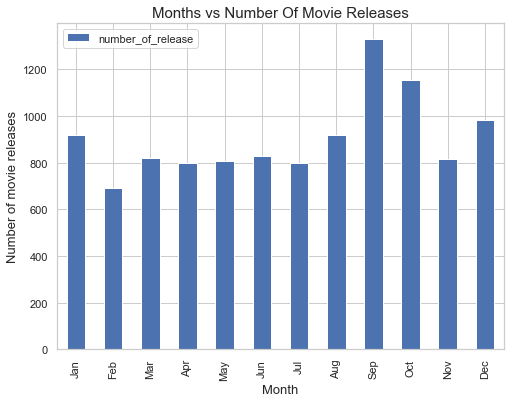

In [109]:
#plot the bar graph using plot.
no_of_rel.plot(x='months',kind='bar',fontsize = 11,figsize=(8,6))

#set the labels and titles of the plot.
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)
sns.set_style("darkgrid")

>**According to the plot we can conclude that there are higher number of release in september and october month.**

In [57]:
#which month made the highest average revenue?.
#make a dataframe with in which store the release month of each movie.
month_rel = pd.DataFrame(month_rel)

#change the column name of the new dataframe 'month_release'.
month_rel.rename(columns = {'release_date':'release_month'},inplace=True)

#add a new column 'revenue' in the dataframe 'month_release'.
month_rel['revenue'] = movies['revenue']


month_rel

,release_month,revenue
0,6,1.513529e+09
1,5,3.784364e+08
2,3,2.952382e+08
3,12,2.068178e+09
4,4,1.506249e+09
...,...,...
10861,6,3.982690e+07
10862,12,3.982690e+07
10863,1,3.982690e+07
10864,11,3.982690e+07


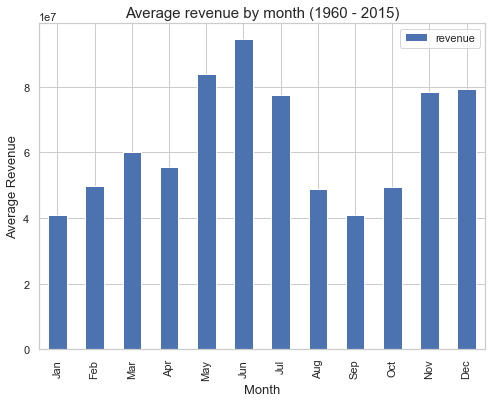

In [61]:
mean_revenue = month_rel.groupby('release_month').mean()
mean_revenue['months'] = months
mean_revenue.plot(x='months',kind='bar',figsize=(8,6))

#setup the title and lables of the plot.
plt.title('Average revenue by month (1960 - 2015)',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Average Revenue',fontsize = 13)
sns.set_style("darkgrid")

> **According tp the plot we can say that movie which release in may or june month made the high revenue in comparison of other month release. Or it can be happened because of outliers.**

### Research Question 12: Which Genre Has The Highest Release Of Movies?

In [86]:
#concatenate the genere column specifying the sep = '|'
#split the concatenated column into lists desregarding the symbol '|'
#convert the list into DataFrane in other to counts the frequency of unique values
def frequency(x):
    total_genre = pd.DataFrame(movies[x].str.cat(sep = '|').split('|')).value_counts()
    return total_genre
frequency('genres')

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64

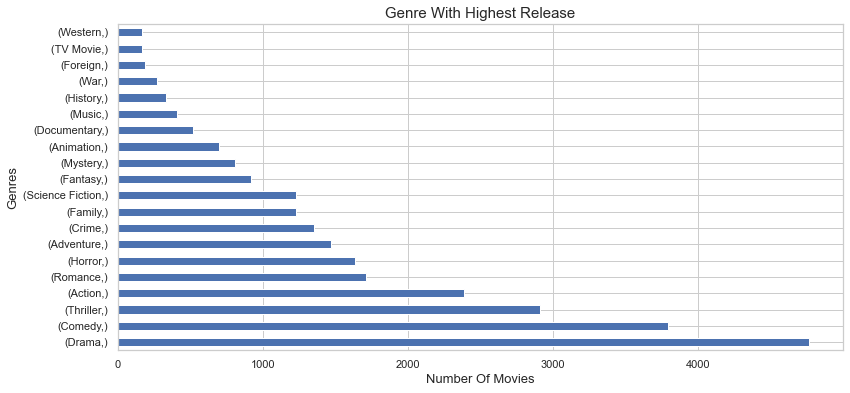

In [83]:
#ploting a  horizontal bar chart of the numbers of genres released
total_genre.plot(kind='barh',figsize=(13,6))

#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")

### Research Question 13: Most frequent Cast?

In [89]:
#using the frequency fucntion to determine the amount of times an actor appear throughout the year
cast_freq = frequency('cast')

cast_freq

Robert De Niro          72
Samuel L. Jackson       71
Bruce Willis            62
Nicolas Cage            61
Michael Caine           53
                        ..
Daisy Victoria Vandy     1
Daisy Ridley             1
Daisy Keeping            1
Kristin Fairlie          1
é‚±æ·‘è²ž                1
Length: 19026, dtype: int64

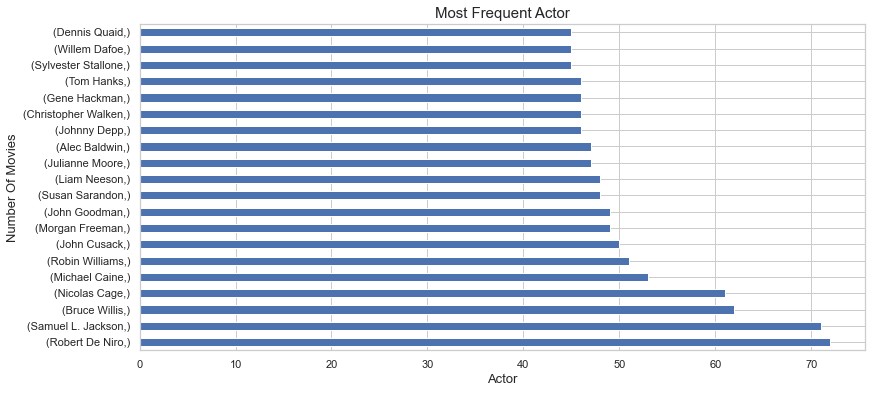

In [92]:
#plot the barh plot.
cast_freq.iloc[:20].plot(kind='barh',figsize=(13,6))


#setup the title and the labels of the plot.
plt.title("Most Frequent Actor",fontsize=15)
plt.xlabel('Actor',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

### Reasearch Question 14: Top 20 Production Companies With Higher Number Of Release?

In [93]:
#using the frequency fucntion to determine the number of movies produced by a production companies throughout the years
prod_freq = frequency('production_companies')

prod_freq

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
                                         ... 
Harbour Productions Limited                 1
Harbour Pictures                            1
Harbor Picture Company                      1
Harbor Light Entertainment                  1
í”„ë¡œë•ì…˜M                                1
Length: 7879, dtype: int64

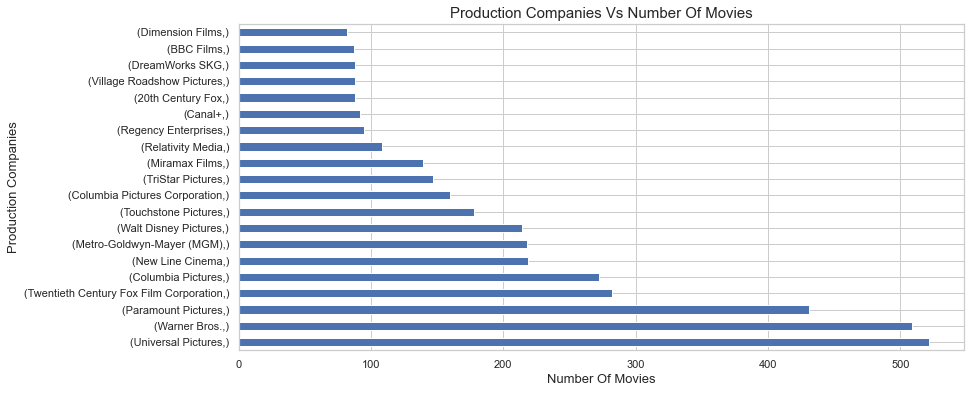

In [100]:
#plot the barh plot.
prod_freq.iloc[:20].plot(kind='barh',figsize=(13,6))


#setup the title and the labels of the plot.
plt.title("Production Companies Vs Number Of Movies",fontsize=15)
plt.ylabel('Production Companies',fontsize=13)
plt.xlabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

### Research Question 15 :   Top 20 Director Who Directs Maximum Movies?

In [102]:
#using the frequency fucntion to determine the number of movies directed by a director throughout the years
dir_freq = frequency('director')

dir_freq

Woody Allen         46
Clint Eastwood      34
Martin Scorsese     31
Steven Spielberg    30
Ridley Scott        23
                    ..
Janet Grillo         1
Jang Hoon            1
Janusz Kaminski      1
Jared Drake          1
Ã€lex Pastor         1
Length: 5362, dtype: int64

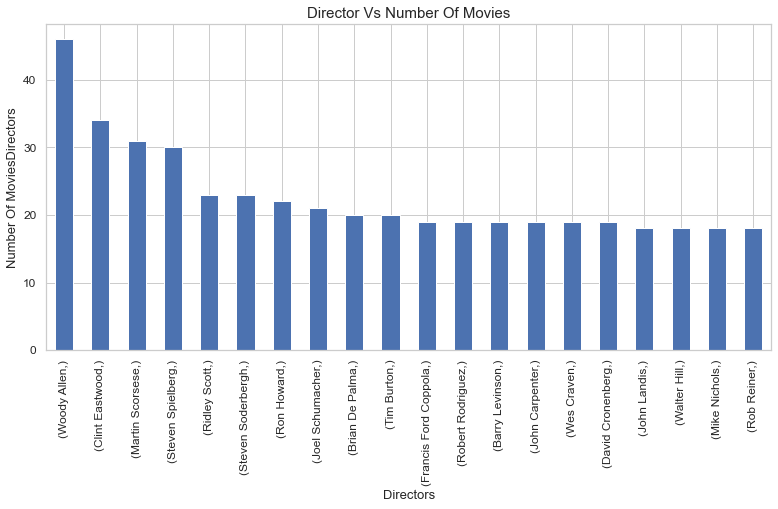

In [108]:
#plot the barh plot.
dir_freq.iloc[:20].plot(kind='bar',figsize=(13,6),fontsize=12)


#setup the title and the labels of the plot.
plt.title("Director Vs Number Of Movies",fontsize=15)
plt.xlabel('Directors',fontsize=13)
plt.ylabel("Number Of Movies"'Directors',fontsize= 13)
sns.set_style("whitegrid")


<a id='conclusions'></a>
## Conclusions

> 
- The year 2014 has the highest release of moives(700) and year 1961 and 1969 has the lowest(31).
- The properties associated with Revenue are Budget,Popularity and Vote_count(Ratings).There is a positive correlation. 
- The Warrior's way is the movie with the largest budget(425,000,000).
- The movie with the lowest profit: The Warrior's Way(-413,912,431) & The movie with the highest profit: Avatar($2,544,505,847).
- The movie with lowest runtime: Fresh Guacamole(2 minutes) & The movie with the highest runtime: The Story of Film: An Odyssey (900 minutes)
- There is a Yearly increase in profit from 2005-2015
- Average runtime of the movies are decreasing year by year.
- May,june,july,november and december are most popular month for releasing movies, if you want to earn more profit.